# Lab 9: Neural Network Initialization and Data Centering

In this lab, you will explore two key concepts in neural network training:
1. The effect of weight initialization on learning
2. The impact of data centering on gradient descent

### Learning Objectives
- Understand how initializing all weights to the same value affects learning
- Observe how non-centered data affects learning

### Step 1: Import Libraries
To begin, import the necessary libraries.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Step 2: Generate Synthetic Data
We will create a 2D dataset for binary classification with two configurations:
1. **Centered Data**: The mean of the dataset is near the origin
2. **Non-Centered Data**: The mean is shifted away from the origin

Your Task:
- Modify the function to shift the data when `centered=False`

In [19]:
# Generate synthetic data
def generate_data(n_samples=200, centered=True):
    np.random.seed(0)
    X = np.random.randn(n_samples, 2)
    y = (X[:, 0] ** 2 + X[:, 1] ** 2 > 1).astype(int)
    
    # TODO: If centered is False, shift the data by adding a constant (e.g., 5)
    if not centered:
        X += 5
    
    return X, y

### Step 3: Simulate a Simple Neural Layer
Here, we define a single layer with a specified number of neurons. Each neuron will learn a different feature.

Your Tasks:
- Implement weight initialization for two cases:
  - **Same Initialization**: All weights are initialized to the same small value
  - **Random Initialization**: Weights are initialized randomly within a range
- Implement the `forward` method to compute the linear transformation of the input

In [20]:
# Simulate a simple neural layer
class SimpleLayer:
    def __init__(self, input_dim, num_neurons, init="random"):
        self.num_neurons = num_neurons
        if init == "same":
            # TODO: Initialize all weights to the same small value (e.g., 0.1)
            self.weights = np.full((input_dim, num_neurons), 0.1)
        elif init == "random":
            # TODO: Initialize weights randomly between -0.5 and 0.5
            self.weights = np.random.uniform(-0.5, 0.5, (input_dim, num_neurons))
        else:
            raise ValueError("Invalid init type!")

    def forward(self, X):
        # TODO: Perform a linear transformation of the input
        return np.dot(X, self.weights)

### Step 4: Visualization Helpers
These functions help visualize:
1. The features learned by neurons in the layer
2. The gradient contours for centered and non-centered data

In [21]:
# Visualization helpers
def plot_features(features, ax, title):
    for i in range(features.shape[1]):
        ax.plot(features[:, i], label=f"Neuron {i+1}")
    ax.set_title(title)
    ax.legend()

def plot_gradient_contours(X, y, ax, title):
    xx, yy = np.meshgrid(np.linspace(-3, 8, 100), np.linspace(-3, 8, 100))
    grad_magnitude = np.sqrt(xx**2 + yy**2) 
    ax.contourf(xx, yy, grad_magnitude, levels=20, cmap="coolwarm")
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolor="k")
    ax.set_title(title)

### Step 5: Analyze and Visualize
Now, you will:
1. Generate datasets (centered and non-centered).
2. Create two neural layers:
   - One with all weights initialized to the same value
   - One with weights initialized randomly
3. Pass the data through these layers and visualize:
   - Features learned by the neurons
   - Gradient contours for centered vs. non-centered data

Your Tasks:
- Complete the TODOs to implement each step
- Observe and compare the visualizations
- In the markdown cell at the bottom, write down your analysis

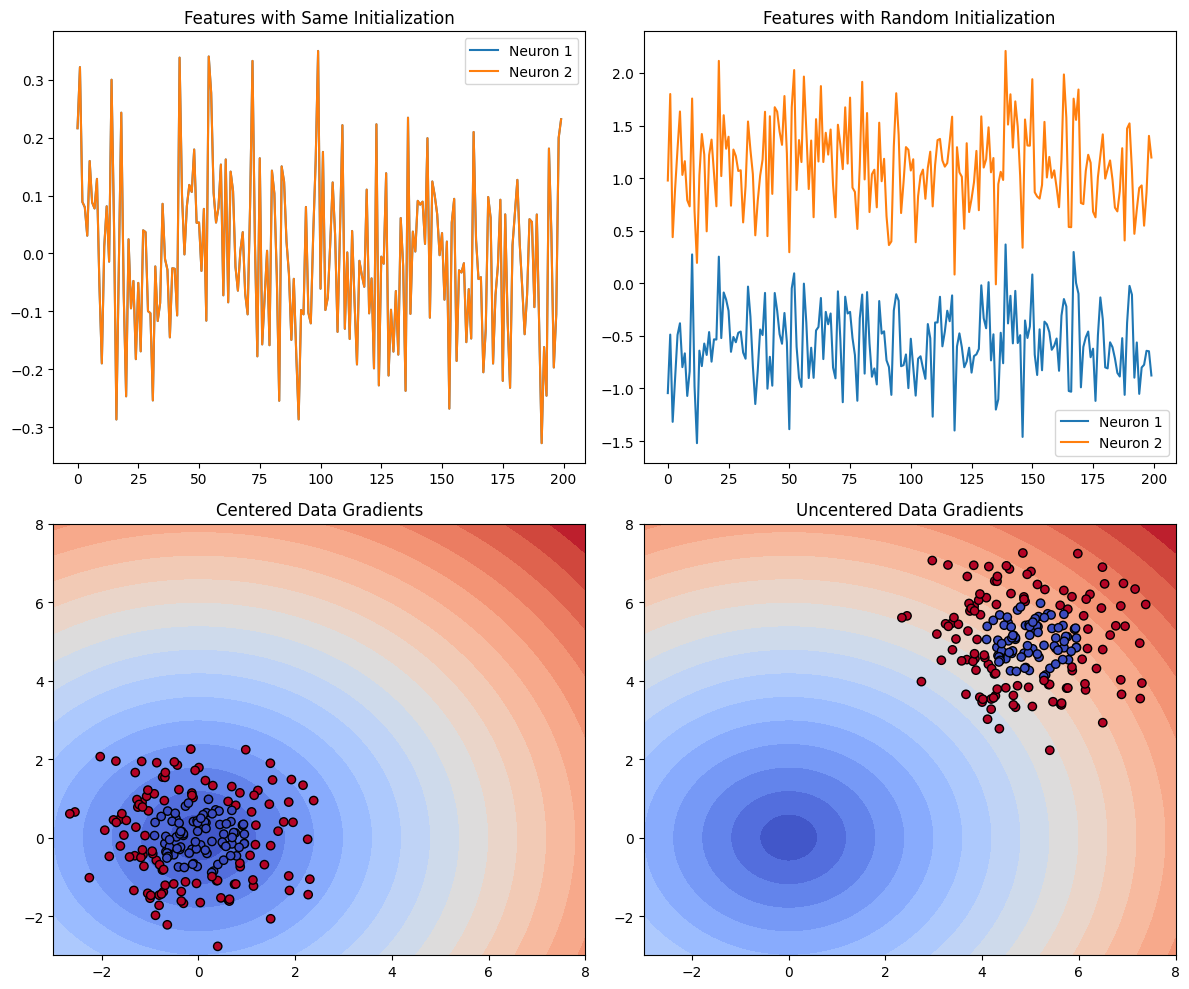

In [22]:
# TODO: Generate centered and non-centered data
X_centered, y = generate_data()
X_uncentered, _ = generate_data(centered=False)


# TODO: Initialize two layers, one with same weights and one with random weights
layer_same = SimpleLayer(2, 2, init="same")
layer_random = SimpleLayer(2, 2, init="random")

# TODO: Forward pass through the layers
features_same = layer_same.forward(X_centered) 
features_random = layer_random.forward(X_uncentered)

# Plot the features
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
plot_features(features_same, axes[0, 0], "Features with Same Initialization")
plot_features(features_random, axes[0, 1], "Features with Random Initialization")

# Gradient visualization (centered vs. uncentered data)
plot_gradient_contours(X_centered, y, axes[1, 0], "Centered Data Gradients")
plot_gradient_contours(X_uncentered, y, axes[1, 1], "Uncentered Data Gradients")

plt.tight_layout()
plt.show()

**Analysis:** 

- Effect of weight initialization on learning: ...
- Impact of data centering on gradient descent: ... 

When weights are initialized to the same small value, all neurons produce identical outputs, preventing them from learning different features. This limitation restricts model expressiveness and can result in slow or ineffective learning. In contrast, random initialization allows each neuron to learn distinct features, enabling the model to capture a wider variety of patterns. This generally leads to improved performance. However, initializing weights with too large values can cause issues like the vanishing gradient problem. This makes it essential to choose an appropriate initialization range.

Additionally, data centering significantly impacts gradient descent. When the mean of the data is close to the origin, gradient descent can converge more quickly and stably, as the gradients act in a balanced direction, facilitating a smoother optimization process. Conversely, when the mean of the data is far from the origin, gradient descent may encounter asymmetric gradients, resulting in slower convergence or difficulties in optimization. This can introduce instability in the learning process and may necessitate further adjustments to achieve the optimal solution. Overall, understanding the effects of weight initialization and data centering is vital for effective neural network training.